# Lab 11 - Correlation, Univariate, Bivariate, Multivariate EDA - Andrew Badzioch

**Types of EDA:**
1. Univariate: Examining one variable (feature, column)
2. Bivariate: Examining two variables
3. Multivariate: Examining more than two variables

**Correlation:**
- relationship between variables. The value for correlation runs between -1 to 1. There are two types:
1. Positive correlation: when the value of the variables go up and down together
2. Negative correlation: when one variable goes up and the other goes down


### 1. Introduction:
- context:
- objective:
- data description: dataset is from Melbourne, AU
    - distance: The distance from the Central Business District (CBD)
    - sellerg: The real estate agent
    - method: The status of the property sale, such as sold, sold prior, or withdrawn prior to auction
    - type: The type of house, such as a house, townhouse, or unit
    - car: The number of car spaces in the property

**complete section**

### Importing the Libraries

In [1]:
# general libraries
import numpy as np
import pandas as pd
import math

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# suppression
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
# loading the dataset
df = pd.read_csv('housing.csv')
df.head(2)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0


In [3]:
# copying the dataset
housing = df.copy()
housing.head(2)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0


### EDA

In [4]:
print("housing shape: ", housing.shape)
print("housing size: ", housing.size)
print("housing columns: ", housing.columns)
print("housing ndim: ", housing.ndim)
print("housing dtypes: \n", housing.dtypes)

housing shape:  (34857, 22)
housing size:  766854
housing columns:  Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')
housing ndim:  2
housing dtypes: 
 Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom          float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea      object
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longtitude       float64
Regionname        object
Propertycount    float64
ParkingArea       object
Price            float64
dtype: object


In [5]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Latitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01
Longtitude,26881.0,1.450019e+02,0.120169,144.42379,144.93350,145.0078,1.450719e+02,1.455264e+02


In [6]:
housing.describe(include='object').T

,count,unique,top,freq
Suburb,34857,351,Reservoir,844
Address,34857,34009,5 Charles St,6
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,388,Jellis,3359
Date,34857,78,28/10/2017,1119
BuildingArea,13760,994,120,177
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34857,8,Southern Metropolitan,11836
ParkingArea,34857,8,Carport,6243


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [8]:
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [9]:
dups = housing[housing.duplicated()].count()
print(dups)

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longtitude       0
Regionname       0
Propertycount    0
ParkingArea      0
Price            0
dtype: int64


In [10]:
housing.drop_duplicates(inplace=True, ignore_index=True)

**Renaming Columns**

In [11]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

In [12]:
# rename some of the columns
housing = housing.rename(columns={'Type':'Property_Type', 'Method':'Method_of_Sale', 'SellerG':'Seller_Agent', 'Regionname':'Region_Name', 'Date':'Date_of_Sale'})

In [13]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Property_Type', 'Method_of_Sale',
       'Seller_Agent', 'Date_of_Sale', 'Distance', 'Postcode', 'Bedroom',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Latitude', 'Longtitude', 'Region_Name', 'Propertycount',
       'ParkingArea', 'Price'],
      dtype='object')

**Dropping Columns**

In [14]:
# deleting the latitude and longitude
housing.drop(['Latitude', 'Longtitude'], inplace=True, axis=1)
# Longitude not Longtitude: spelling error in the dataset

In [15]:
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Property_Type', 'Method_of_Sale',
       'Seller_Agent', 'Date_of_Sale', 'Distance', 'Postcode', 'Bedroom',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Region_Name', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

In [16]:
# delete one column
housing.drop('Bedroom', inplace=True, axis=1)
housing.columns

Index(['Suburb', 'Address', 'Rooms', 'Property_Type', 'Method_of_Sale',
       'Seller_Agent', 'Date_of_Sale', 'Distance', 'Postcode', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Region_Name', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

#### 1. Univariate EDA

In [17]:
# looking into the suburb variable
# 1. checking the unique suburbs and their values in this dataset
housing['Suburb'].value_counts()

Suburb
Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
                 ... 
Avonsleigh          1
Wandin North        1
Ferny Creek         1
Guys Hill           1
viewbank            1
Name: count, Length: 351, dtype: int64

In [18]:
housing['Suburb'].value_counts().head(10)

Suburb
Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
Kew               467
Brighton          456
Brunswick         444
South Yarra       435
Hawthorn          428
Name: count, dtype: int64

<Axes: xlabel='Suburb'>

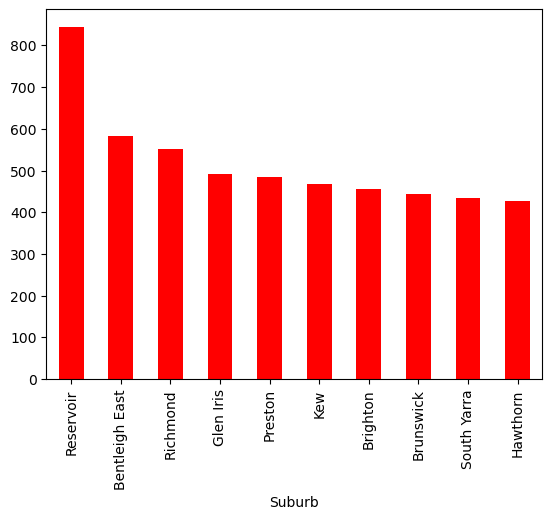

In [19]:
housing['Suburb'].value_counts().head(10).plot(kind='bar', color='red')

In [20]:
# finding the unique names of suburbs
housing['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [21]:
# index one value inside a variable
housing.query('Suburb == "Melbourne"')

,Suburb,Address,Rooms,Property_Type,Method_of_Sale,Seller_Agent,Date_of_Sale,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Region_Name,Propertycount,ParkingArea,Price
193,Melbourne,19/562 Little Bourke St,1,u,PI,Harcourts,3/9/2016,2.8,3000.0,1.0,1.0,0.0,53,1900.0,Melbourne City Council,Northern Metropolitan,17496.0,Carport,NaN
194,Melbourne,605/55 Queens Rd,1,u,PI,RT,3/9/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Detached Garage,400000.0
593,Melbourne,318/9 Commercial Rd,1,u,S,hockingstuart,3/12/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Attached Garage,365000.0
594,Melbourne,902/16 Liverpool St,1,u,S,Harcourts,3/12/2016,2.8,3000.0,1.0,0.0,0.0,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Indoor,427000.0
595,Melbourne,173/350 St Kilda Rd,2,u,VB,Marshall,3/12/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Carport,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34690,Melbourne,509/33 MacKenzie St,2,u,PI,Dingle,30/07/2016,2.8,3000.0,1.0,1.0,1751.0,NaN,2012.0,Melbourne City Council,Northern Metropolitan,17496.0,Detached Garage,390000.0
34691,Melbourne,901/469 St Kilda Rd,3,u,SN,Rodney,30/07/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Attached Garage,NaN
34692,Melbourne,18/539 St Kilda Rd,1,u,SP,Greg,30/07/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Indoor,510000.0
34693,Melbourne,1007/594 St Kilda Rd,2,u,S,Gary,30/07/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Parkade,607000.0


In [22]:
housing[housing['Suburb'] == 'Melbourne']

,Suburb,Address,Rooms,Property_Type,Method_of_Sale,Seller_Agent,Date_of_Sale,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Region_Name,Propertycount,ParkingArea,Price
193,Melbourne,19/562 Little Bourke St,1,u,PI,Harcourts,3/9/2016,2.8,3000.0,1.0,1.0,0.0,53,1900.0,Melbourne City Council,Northern Metropolitan,17496.0,Carport,NaN
194,Melbourne,605/55 Queens Rd,1,u,PI,RT,3/9/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Detached Garage,400000.0
593,Melbourne,318/9 Commercial Rd,1,u,S,hockingstuart,3/12/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Attached Garage,365000.0
594,Melbourne,902/16 Liverpool St,1,u,S,Harcourts,3/12/2016,2.8,3000.0,1.0,0.0,0.0,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Indoor,427000.0
595,Melbourne,173/350 St Kilda Rd,2,u,VB,Marshall,3/12/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Carport,1200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34690,Melbourne,509/33 MacKenzie St,2,u,PI,Dingle,30/07/2016,2.8,3000.0,1.0,1.0,1751.0,NaN,2012.0,Melbourne City Council,Northern Metropolitan,17496.0,Detached Garage,390000.0
34691,Melbourne,901/469 St Kilda Rd,3,u,SN,Rodney,30/07/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Attached Garage,NaN
34692,Melbourne,18/539 St Kilda Rd,1,u,SP,Greg,30/07/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Indoor,510000.0
34693,Melbourne,1007/594 St Kilda Rd,2,u,S,Gary,30/07/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,Melbourne City Council,Northern Metropolitan,17496.0,Parkade,607000.0


In [23]:
# creating a new dataset with only one variable: Distance
housing_1 = housing['Distance']

In [24]:
housing_1.head()

0     2.5
1    13.5
2     3.3
3     3.3
4     6.4
Name: Distance, dtype: float64

In [25]:
type(housing_1)

pandas.core.series.Series

In [26]:
housing_1.shape

(34857,)

In [27]:
housing_1.isnull().sum()

1

In [28]:
housing_1.dropna(inplace=True)

In [29]:
housing_1.isnull().sum()

0

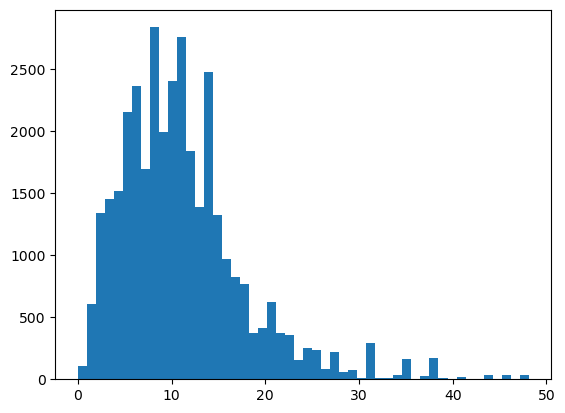

In [30]:
# check out the data distribution
# histogram
plt.hist(housing_1, bins=50);

<Axes: xlabel='Distance', ylabel='Density'>

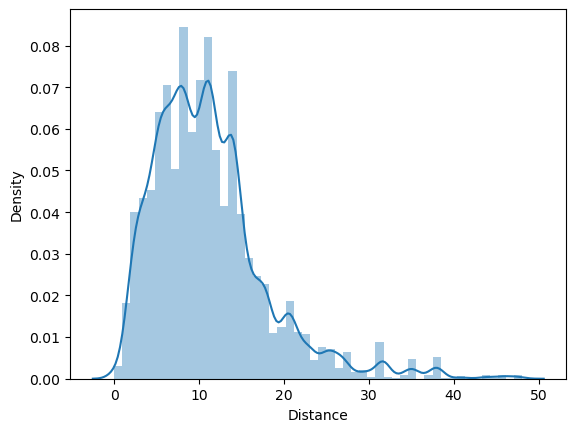

In [31]:
sns.distplot(housing_1)

##### examining the data distribution by checking the mean, median, and mode in this dataset (housing_1)

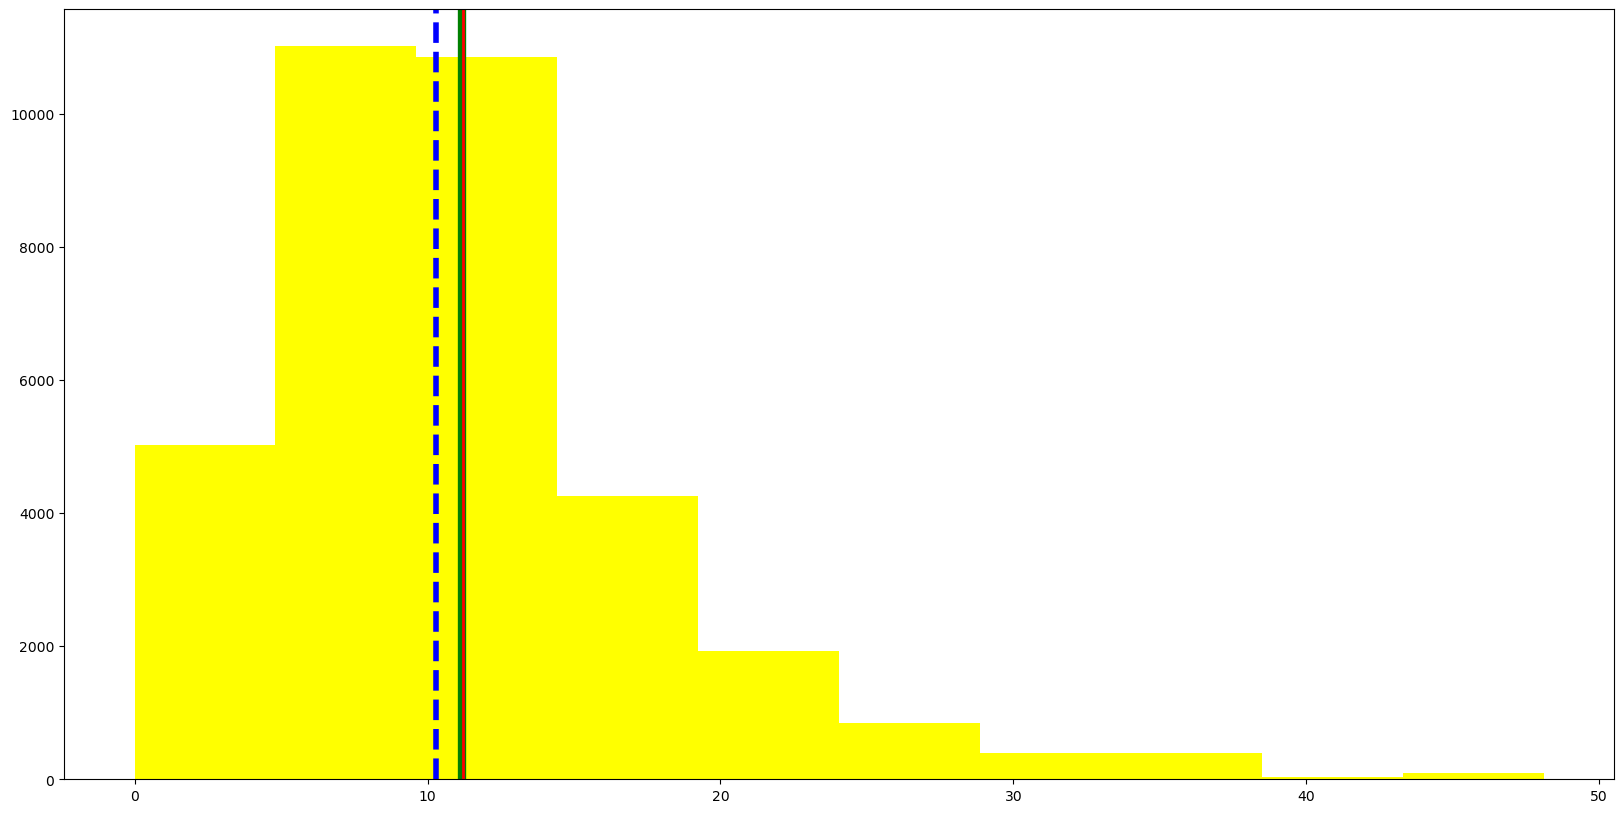

In [32]:
# 1. set the size of the histogram
plt.figure(figsize=(20, 10))

# 2. creating the histogram and backgroun color
plt.hist(housing_1, color='yellow')

# 3. calculating the mean
plt.axvline(housing_1.mean(), color='green', linestyle='-', linewidth=6)

# 4. calculating median
plt.axvline(housing_1.median(), color='blue', linestyle='--', linewidth=4)

# 5. calculating mode
plt.axvline(housing_1.mode()[0], color='red', linestyle='-', linewidth=2)
# zero index

**Observation:**
- add 6 points

**The 2 most popular techniques used in multivariate EDA are Correlation and Heatmap**
- Important: both techniques can only perform on numeric dtypes only


In [33]:
# 1. create the numeric dataset
num_cols = housing[['Price', 'Landsize', 'Distance', 'Rooms', 'Bathroom']]
num_cols.head()

,Price,Landsize,Distance,Rooms,Bathroom
0,NaN,126.0,2.5,2,1.0
1,840000.0,303.0,13.5,3,2.0
2,1275000.0,120.0,3.3,2,1.0
3,1455000.0,159.0,3.3,2,1.0
4,NaN,174.0,6.4,3,2.0


In [34]:
# 2. the Correlation table
num_cols.corr()

,Price,Landsize,Distance,Rooms,Bathroom
Price,1.000000,0.032748,-0.211384,0.465238,0.429878
Landsize,0.032748,1.000000,0.060862,0.037402,0.036333
Distance,-0.211384,0.060862,1.000000,0.271511,0.126201
Rooms,0.465238,0.037402,0.271511,1.000000,0.611826
Bathroom,0.429878,0.036333,0.126201,0.611826,1.000000


<Axes: >

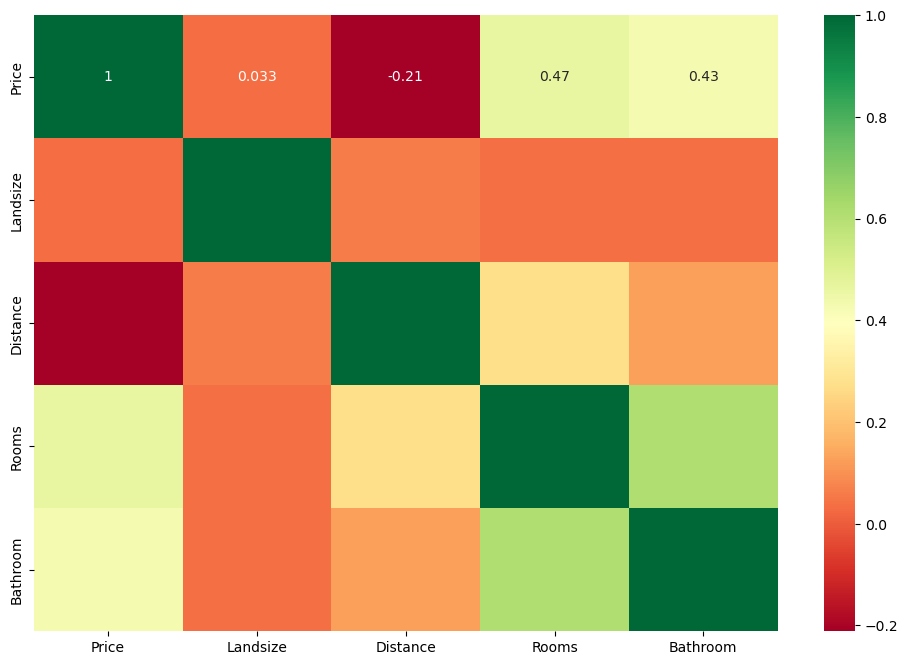

In [35]:
# 3. Heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(num_cols.corr(), cmap='RdYlGn', annot=True)

### Conclusion:15

#### End of Lab 11